Participant:  4


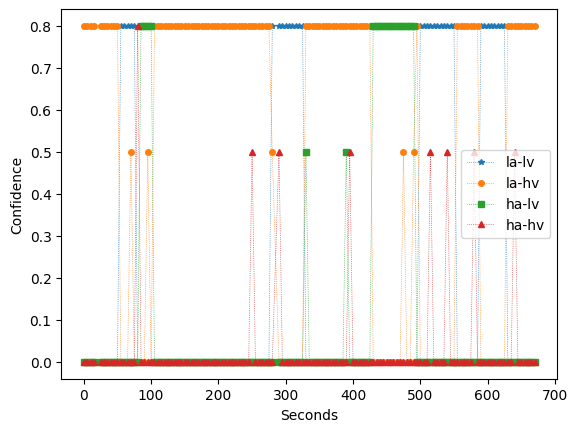

[28  2  0  3  0 76  2  4  0  3 14  0  0  0  0  1]
0.8947368421052632
Participant:  5


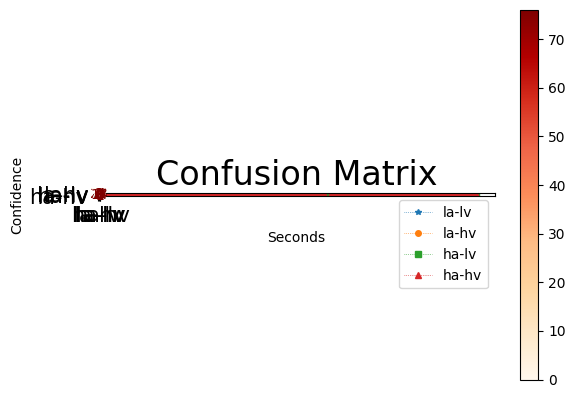

[ 0  0  0  0  0 22  0  6  0  0  2  3  0  1  0 88]
Participant:  8


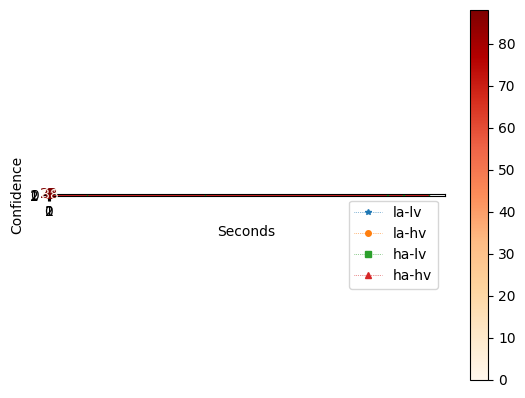

[  0   0   0   0   0   0   0   0   0   0   7   4   0   0   0 104]
Participant:  9


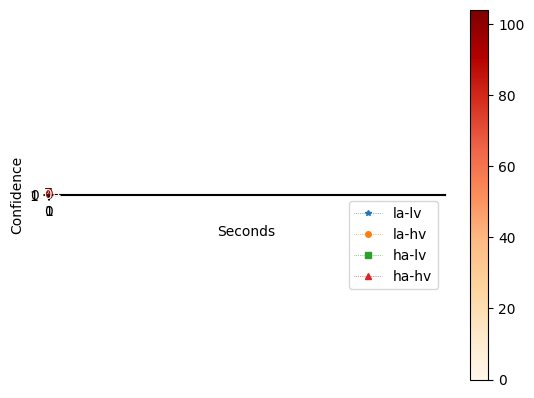

[ 0  0  0  0  0 57  0  5  0  0  4  0  0  1  0 51]
Participant:  10


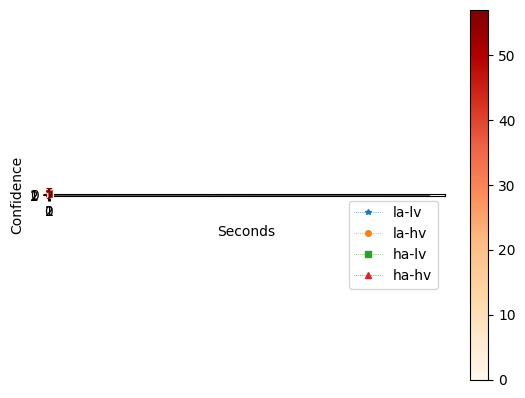

[14  2  1  2  0 27  2  5  0  2 29  5  0  6  1 21]
0.7777777777777778
Participant:  11


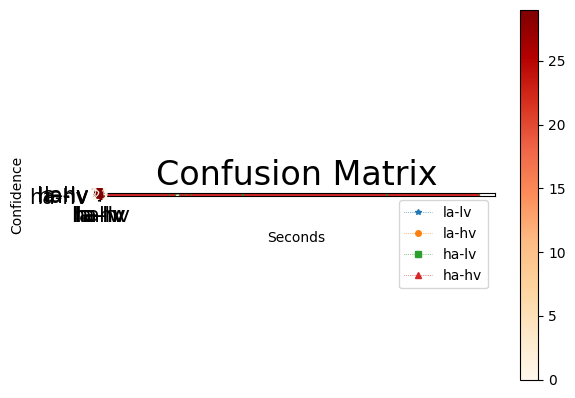

[ 0  0  0  0  0 17  0  3  0  0  0  0  0  0  0 92]
Participant:  13


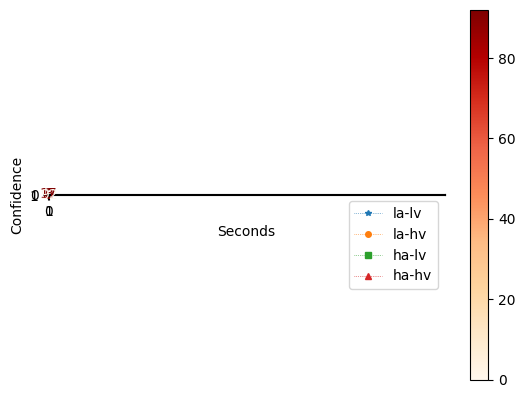

[ 0  0  0  0  0 25  1  7  0  0 16  2  0  1  1 62]
Participant:  14


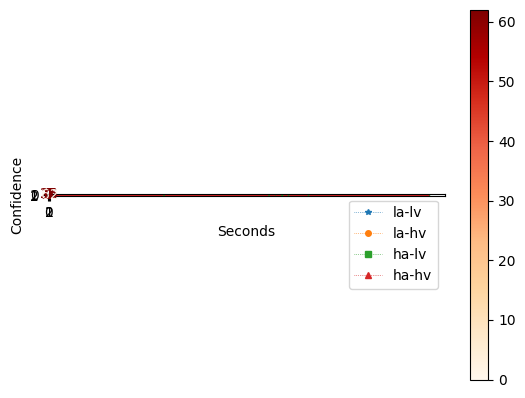

[11  0  0  0  0 10  0  3  1  1 56  4  0  1  2 21]
0.8909090909090909
Participant:  15


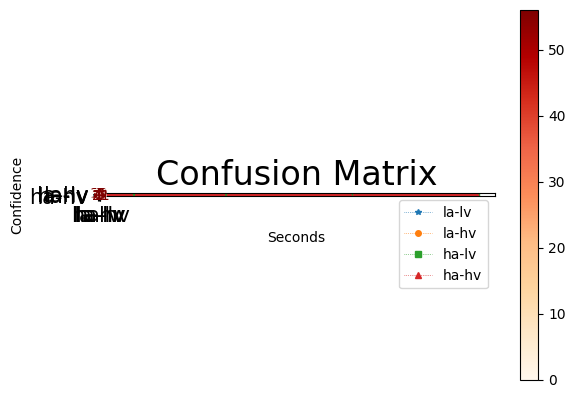

[17  0  1  4  0  8  1  2  0  0 18  4  0  1  1 59]
0.8793103448275862
Participant:  16


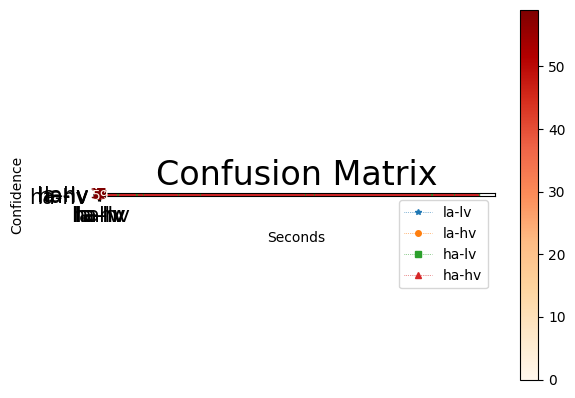

[ 0  0  0  0  0 27  0  3  0  0  0  0  0  2  0 79]
Participant:  19


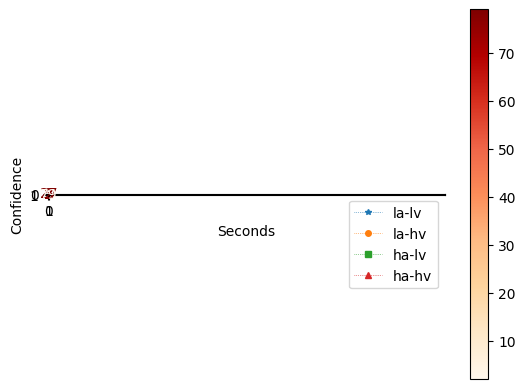

[ 0  0  0  0  0 45  0 11  0  0  0  0  0  5  1 55]
Participant:  22


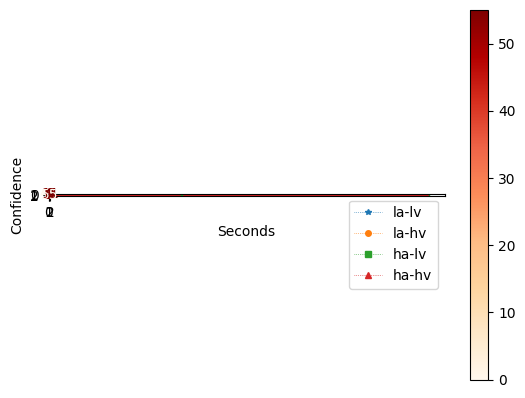

[ 0  0  0  0  0  0  0  0  0  0 31  6  0  0  5 66]
Participant:  23


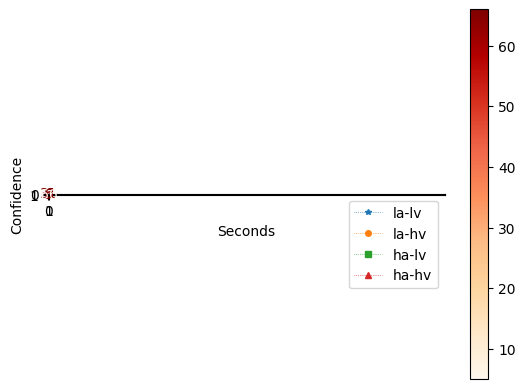

[ 0  0  0  0  0  7  0  0  0  0 32 13  0  0  0 66]
Participant:  24


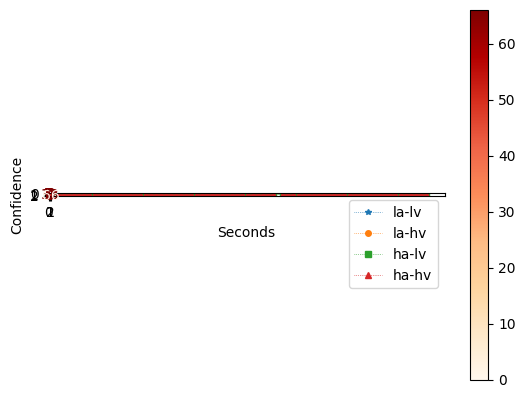

[ 0  0  0  0  0 68  0  1  0  0  0  0  0  1  0  3]
Participant:  25


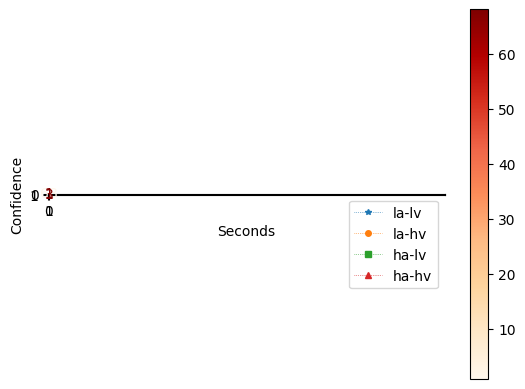

[ 0  0  0  0  0 72  0  4  0  0  0  0  0  2  1 42]
Participant:  26


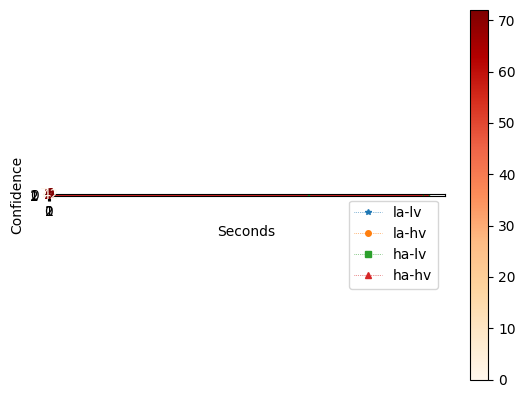

[ 0  0  0  0  0  0  0  0  0  1 26  3  0  2  0 89]
Participant:  27


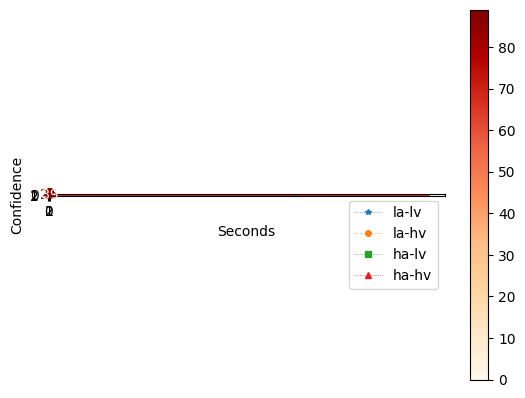

[ 0  0  0  0  0  0  0  0  0  0 18  4  0  1  0 95]
Participant:  28


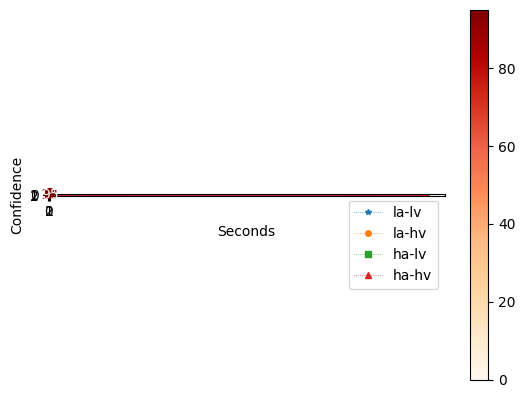

[19  3  0  4  0 22  0  8  0  0 16  3  0  3  1 40]
0.8151260504201681
Participant:  31


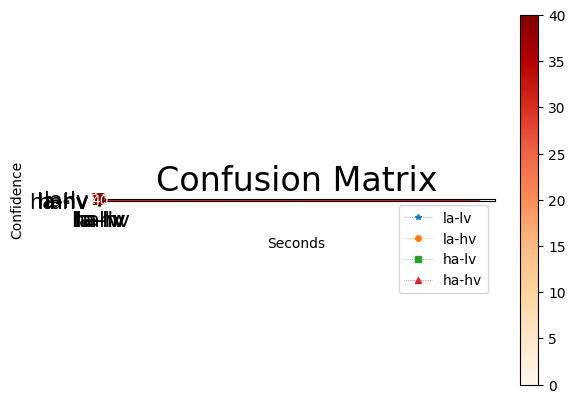

[22  2  0  1  1 69  0  4  0  0  0  0  0  3  0 22]
Participant:  32


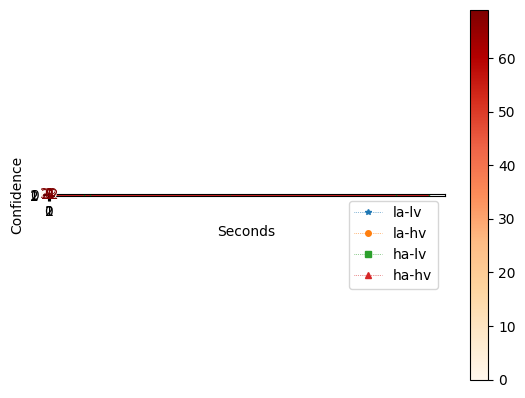

[  0   0   0   0   0   0   0   0   0   0  11   4   0   0   0 108]


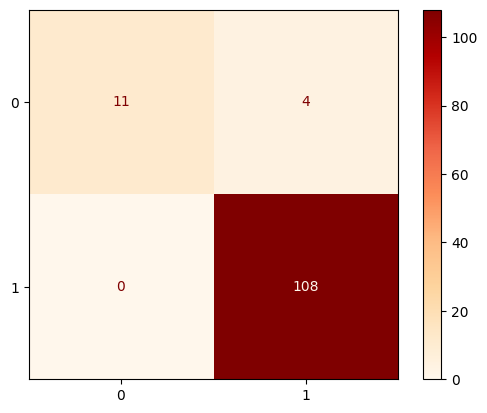

In [77]:
import pickle 
import numpy as np
import seaborn as sn
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

def plot_proba(proba, time, y_test):
    classes = ['la-lv', 'la-hv', 'ha-lv', 'ha-hv']
    markers = ['*','o','s', '^']

    for i in range(4):
        plt.plot(time, proba[:,i], label=classes[i], linestyle=':', linewidth=0.5, marker=markers[i], markersize=4)

    plt.xlabel('Seconds')
    plt.ylabel('Confidence')
    plt.legend()
    plt.show()

def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)

#load the model
model_path = 'trained_models/xgb_testmulticlass.model'
clf = load_model(model_path)
skiped = [1,2,3,6,7,12,17,18,20,21,29,30]
for participant in range(1, 33): 
    if participant in skiped:
        continue
    print ('Participant: ', participant)
    #load the data
    data_path = '../features/' + str(participant) +  '.csv'
    data =  np.loadtxt(data_path, delimiter=',')

    filter = 20
    filter = len(data) 
    labels = data[:filter, -2]
    time = data[:filter, -1]
    features = data[:filter, :-2]

    #print(len(features), len(labels), len(time))
    dtest = xgb.DMatrix(features)
    preds = clf.predict(dtest)
    #predict_proba = clf.predict_proba(features)

    predict_pr = [[0, 0, 0, 0] for i in range(len(labels))]
    for i in range(len(labels)):
        predict_pr[i][int(preds[i])] = 0.5
        predict_pr[i][int(labels[i])] = 0.8
    predict_pr = np.asarray(predict_pr)
    plot_proba(predict_pr, time, labels)
    mat = conf_mat(labels, preds, labels=[0,1,2,3])
    values = print(mat.flatten());
    classes = ['la-lv', 'la-hv', 'ha-lv', 'ha-hv']

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    confustion_matrix_data = confusion_matrix(labels, preds)
    
    display_c_m = ConfusionMatrixDisplay(confustion_matrix_data,
                                        display_labels=classes)
    try:
        display_c_m.plot(cmap='OrRd')#, xticks_rotation=25)
    except:
        continue
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Confusion Matrix', fontsize=24)
    #break
    plt.savefig('plots/' + str(participant) + ".png", transparent=True, dpi=500)
    #sn.heatmap(mat, annot=True)
    acc = accuracy_score(labels, preds)
    #f1 = f1_score(labels, preds)
    print(acc)